In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np

In [2]:
bookings=pd.read_csv('hotel_bookings_clean.csv')
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36653 entries, 0 to 36652
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     36653 non-null  int64  
 1   lead_time                       36653 non-null  int64  
 2   arrival_date_week_number        36653 non-null  int64  
 3   arrival_date_day_of_month       36653 non-null  int64  
 4   arrival_date_month              36653 non-null  int64  
 5   stays_in_weekend_nights         36653 non-null  int64  
 6   stays_in_week_nights            36653 non-null  int64  
 7   adults                          36653 non-null  int64  
 8   children                        36653 non-null  float64
 9   babies                          36653 non-null  int64  
 10  is_repeated_guest               36653 non-null  int64  
 11  previous_cancellations          36653 non-null  int64  
 12  previous_bookings_not_canceled  

In [3]:
bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,36653.000000,36653.000000,36653.000000,36653.000000,36653.000000,36653.000000,36653.000000,36653.000000,36653.000000,36653.000000,...,36652.000000,36652.000000,36652.000000,36652.000000,36652.000000,36652.000000,36652.000000,36652.000000,36652.000000,36652.000000
mean,0.303359,89.928764,27.068726,15.743323,6.519194,1.167844,3.078029,1.856192,0.120700,0.013205,...,0.040080,0.014733,0.000164,0.949252,0.046873,0.003874,0.039288,0.006875,0.753329,0.200507
std,0.459715,96.227864,14.576595,8.860422,3.311833,1.147686,2.462015,0.718456,0.433635,0.115814,...,0.196149,0.120484,0.012794,0.219485,0.211370,0.062124,0.194283,0.082634,0.431080,0.400386
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,15.000000,8.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,54.000000,28.000000,16.000000,7.000000,1.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,149.000000,39.000000,23.000000,9.000000,2.000000,5.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,31.000000,12.000000,19.000000,50.000000,55.000000,10.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='is_canceled'>

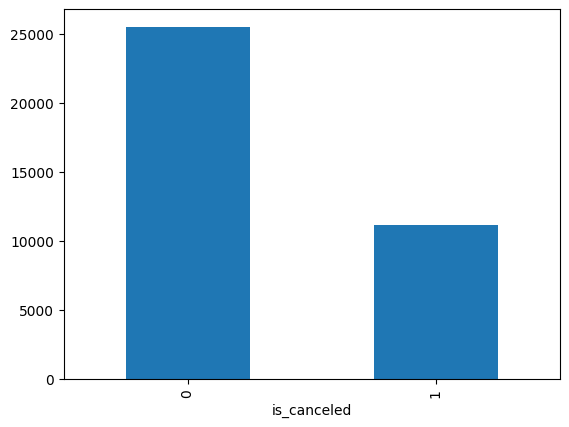

In [4]:
bookings['is_canceled'].value_counts().plot(kind='bar')

In [5]:
bookings['is_canceled'].value_counts()/bookings['is_canceled'].count()

,count
is_canceled,
0,0.696641
1,0.303359


In [6]:
X, y =bookings.iloc[:,1:], bookings.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=123)
xgb_clf=xgb.XGBClassifier(random_state=123)
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [8]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [9]:
preds=xgb_clf.predict(X_test)
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [10]:
accurancy=float(np.sum(preds==y_test))/y_test.shape[0]
print('Baseline accurancy:',accurancy)

Baseline accurancy: 0.8562334656084656


In [11]:
xgb_clf.set_params(n_estimetor=10)
xgb_clf.set_params(max_depth=3)
xgb_clf.set_params(eval_metric='error')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_estimetor=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [12]:
xgb_clf.fit(X_train, y_train)
preds=xgb_clf.predict(X_test)
xgb_clf.get_params()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:52:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimetor" } are not used.

  warnings.warn(smsg, UserWarning)


{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'error',
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'n_estimetor': 10}

In [13]:
accurancy = float(np.sum(preds==y_test))/y_test.shape[0]
print('baseline accurancy:', accurancy)

baseline accurancy: 0.8365575396825397


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

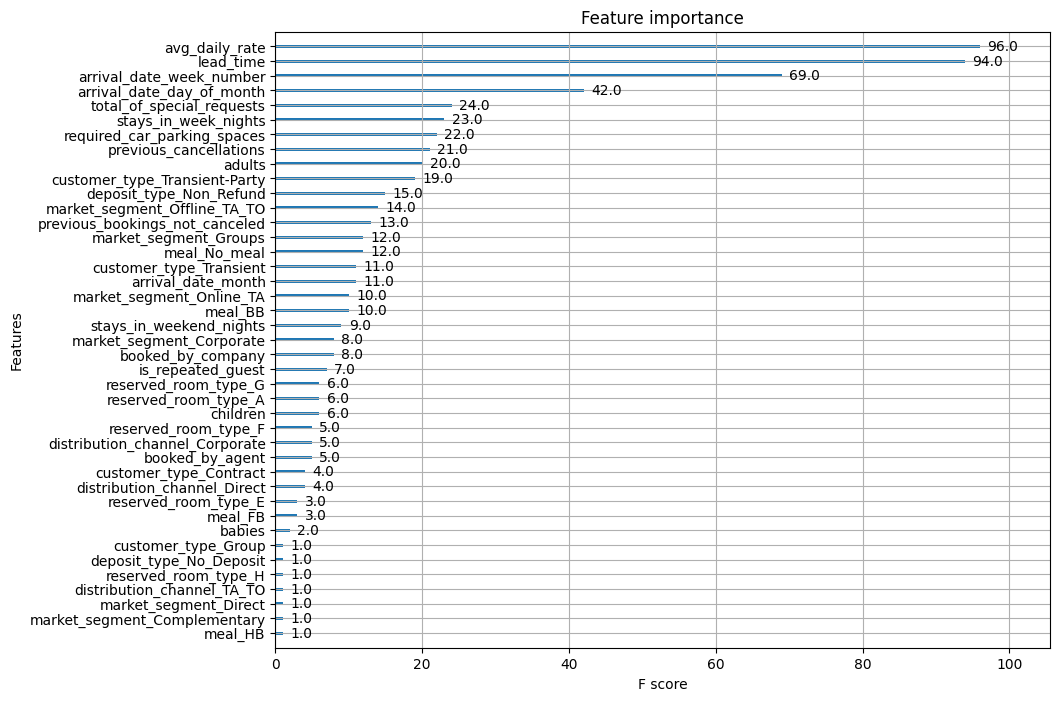

In [14]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10.0,8]
xgb.plot_importance(xgb_clf)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

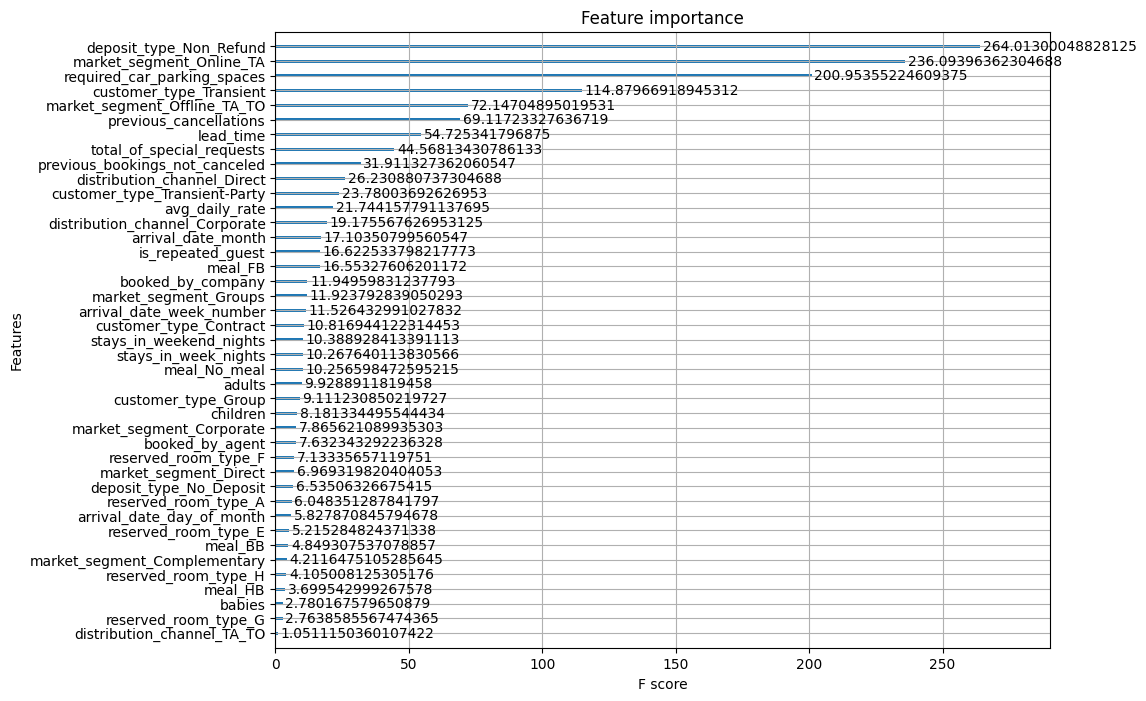

In [15]:
xgb.plot_importance(xgb_clf, importance_type='gain')

<Axes: >

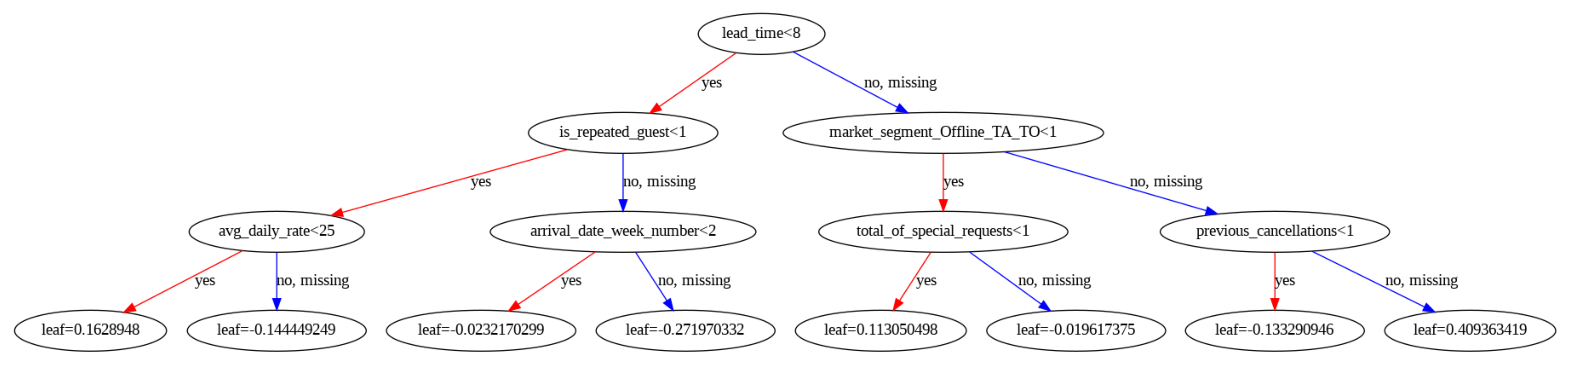

In [16]:
matplotlib.rcParams['figure.figsize']=[20.0,8]
xgb.plot_tree(xgb_clf, num_trees=9)